In [1]:
import numpy as np
from scipy.io import loadmat
import pickle
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
default_img_set()

In [2]:
with open("Fig7_1.pkl", "rb") as f:
    temp = pickle.load(f)
    M1_s1_pre = temp["M1_s1_pre"]
    M1_s2_pre = temp["M1_s2_pre"]
    M1_s1_post = temp["M1_s1_post"]
    M1_s2_post = temp["M1_s2_post"]
with open("Fig7_2.pkl", "rb") as f:
    temp = pickle.load(f)
    M2_s1_pre = temp["M2_s1_pre"]
    M2_s2_pre = temp["M2_s2_pre"]
    M2_s1_post = temp["M2_s1_post"]
    M2_s2_post = temp["M2_s2_post"]


In [3]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3
Clist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227]), np.array(ryzcolor(1))]
Calphalist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227, 1.0]), np.array(ryzcolor(1))]
Calphalist[0][-1]=0.3
Calphalist[1][-1]=0.3
Calphalist[2][-1]=0.3
Calphalist[3][-1]=0.3

In [4]:
def plot_contour(data, color, linestyle):
    xedges = np.linspace(0, 21, 21, endpoint=False)
    yedges = np.linspace(0, 21, 21, endpoint=False)
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    X, Y = np.meshgrid(xcenters, ycenters)
    points = np.column_stack((X.ravel(), Y.ravel()))
    grid_x, grid_y = np.mgrid[xcenters[0]:xcenters[-1]:500j, ycenters[0]:ycenters[-1]:500j]
    counts, xedges, yedges = np.histogram2d(data[0], data[1], bins=(xedges, yedges), density=True)
    values = counts.ravel()
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
    max_idx = np.unravel_index(np.argmax(grid_z), grid_z.shape)
    max_x = grid_x[max_idx]
    max_y = grid_y[max_idx]
    plt.scatter(max_y, max_x, color=color)
    plt.contour(grid_x, grid_y, grid_z.T, levels=[0.5 * np.max(grid_z)], colors=color, linestyles=linestyle)

(0.5, 10.0)

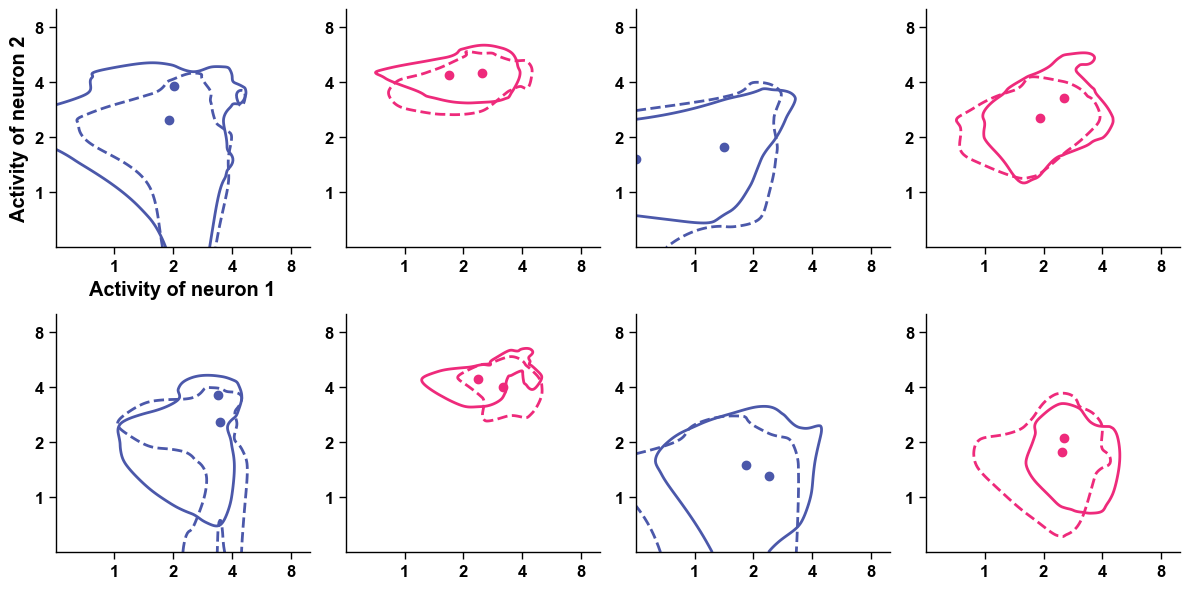

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
plt.sca(ax[0, 0])
plot_contour(M1_s1_pre[6][[3,23]]/10, color=C0.reshape(-1,4), linestyle='solid')
plot_contour(M1_s2_pre[6][[3,23]]/10, color=C0.reshape(-1,4), linestyle='dashed')
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log')
ax[0, 0].minorticks_off()
ax[0, 0].set_xticks([1, 2, 4, 8])
ax[0, 0].set_yticks([1, 2, 4, 8])
ax[0, 0].set_xticklabels(["1", "2", "4", "8"])
ax[0, 0].set_yticklabels(["1", "2", "4", "8"])
ax[0, 0].set_xlim([0.5,10])
ax[0, 0].set_ylim([0.5,10])
ax[0, 0].set_xlabel('Activity of neuron 1')
ax[0, 0].set_ylabel('Activity of neuron 2')

plt.sca(ax[0, 1])
plot_contour(M1_s1_post[6][[3,23]]/10, color=C1.reshape(-1,4), linestyle='solid')
plot_contour(M1_s2_post[6][[3,23]]/10, color=C1.reshape(-1,4), linestyle='dashed')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')
ax[0, 1].minorticks_off()
ax[0, 1].set_xticks([1, 2, 4, 8])
ax[0, 1].set_yticks([1, 2, 4, 8])
ax[0, 1].set_xticklabels(["1", "2", "4", "8"])
ax[0, 1].set_yticklabels(["1", "2", "4", "8"])
ax[0, 1].set_xlim([0.5,10])
ax[0, 1].set_ylim([0.5,10])
# ax[0, 1].set_xlabel('Activity of neuron 1')
# ax[0, 1].set_ylabel('Activity of neuron 2')

plt.sca(ax[1, 0])
plot_contour(M1_s1_pre[6][[11,23]]/10, color=C0.reshape(-1,4), linestyle='solid')
plot_contour(M1_s2_pre[6][[11,23]]/10, color=C0.reshape(-1,4), linestyle='dashed')
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 0].minorticks_off()
ax[1, 0].set_xticks([1, 2, 4, 8])
ax[1, 0].set_yticks([1, 2, 4, 8])
ax[1, 0].set_xticklabels(["1", "2", "4", "8"])
ax[1, 0].set_yticklabels(["1", "2", "4", "8"])
ax[1, 0].set_xlim([0.5,10])
ax[1, 0].set_ylim([0.5,10])
# ax[0, 2].set_xlabel('Activity of neuron 1')
# ax[0, 2].set_ylabel('Activity of neuron 2')

plt.sca(ax[1, 1])
plot_contour(M1_s1_post[6][[11,23]]/10, color=C1.reshape(-1,4), linestyle='solid')
plot_contour(M1_s2_post[6][[11,23]]/10, color=C1.reshape(-1,4), linestyle='dashed')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 1].minorticks_off()
ax[1, 1].set_xticks([1, 2, 4, 8])
ax[1, 1].set_yticks([1, 2, 4, 8])
ax[1, 1].set_xticklabels(["1", "2", "4", "8"])
ax[1, 1].set_yticklabels(["1", "2", "4", "8"])
ax[1, 1].set_xlim([0.5,10])
ax[1, 1].set_ylim([0.5,10])
# ax[0, 3].set_xlabel('Activity of neuron 1')
# ax[0, 3].set_ylabel('Activity of neuron 2')

plt.sca(ax[0, 2])
plot_contour(M2_s1_pre[7][[0,1]]/10, color=C0.reshape(-1,4), linestyle='solid')
plot_contour(M2_s2_pre[7][[0,1]]/10, color=C0.reshape(-1,4), linestyle='dashed')
ax[0, 2].set_xscale('log')
ax[0, 2].set_yscale('log')
ax[0, 2].minorticks_off()
ax[0, 2].set_xticks([1, 2, 4, 8])
ax[0, 2].set_yticks([1, 2, 4, 8])
ax[0, 2].set_xticklabels(["1", "2", "4", "8"])
ax[0, 2].set_yticklabels(["1", "2", "4", "8"])
ax[0, 2].set_xlim([0.5,10])
ax[0, 2].set_ylim([0.5,10])
# ax[1, 0].set_xlabel('Activity of neuron 1')
# ax[1, 0].set_ylabel('Activity of neuron 2')

plt.sca(ax[0, 3])
plot_contour(M2_s1_post[7][[0,1]]/10, color=C1.reshape(-1,4), linestyle='solid')
plot_contour(M2_s2_post[7][[0,1]]/10, color=C1.reshape(-1,4), linestyle='dashed')
ax[0, 3].set_xscale('log')
ax[0, 3].set_yscale('log')
ax[0, 3].minorticks_off()
ax[0, 3].set_xticks([1, 2, 4, 8])
ax[0, 3].set_yticks([1, 2, 4, 8])
ax[0, 3].set_xticklabels(["1", "2", "4", "8"])
ax[0, 3].set_yticklabels(["1", "2", "4", "8"])
ax[0, 3].set_xlim([0.5,10])
ax[0, 3].set_ylim([0.5,10])
# ax[1, 1].set_xlabel('Activity of neuron 1')
# ax[1, 1].set_ylabel('Activity of neuron 2')

plt.sca(ax[1, 2])
plot_contour(M2_s1_pre[7][[1,2]]/10, color=C0.reshape(-1,4), linestyle='solid')
plot_contour(M2_s2_pre[7][[1,2]]/10, color=C0.reshape(-1,4), linestyle='dashed')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')
ax[1, 2].minorticks_off()
ax[1, 2].set_xticks([1, 2, 4, 8])
ax[1, 2].set_yticks([1, 2, 4, 8])
ax[1, 2].set_xticklabels(["1", "2", "4", "8"])
ax[1, 2].set_yticklabels(["1", "2", "4", "8"])
ax[1, 2].set_xlim([0.5,10])
ax[1, 2].set_ylim([0.5,10])
# ax[1, 2].set_xlabel('Activity of neuron 1')
# ax[1, 2].set_ylabel('Activity of neuron 2')

plt.sca(ax[1, 3])
plot_contour(M2_s1_post[7][[1,2]]/10, color=C1.reshape(-1,4), linestyle='solid')
plot_contour(M2_s2_post[7][[1,2]]/10, color=C1.reshape(-1,4), linestyle='dashed')
ax[1, 3].set_xscale('log')
ax[1, 3].set_yscale('log')
ax[1, 3].minorticks_off()
ax[1, 3].set_xticks([1, 2, 4, 8])
ax[1, 3].set_yticks([1, 2, 4, 8])
ax[1, 3].set_xticklabels(["1", "2", "4", "8"])
ax[1, 3].set_yticklabels(["1", "2", "4", "8"])
ax[1, 3].set_xlim([0.5,10])
ax[1, 3].set_ylim([0.5,10])
# ax[1, 3].set_xlabel('Activity of neuron 1')
# ax[1, 3].set_ylabel('Activity of neuron 2')
